In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_200_7200_100_new2threshold_fixedhurst.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_200_7200_100_new2threshold_fixedhurst.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_200_7200_100_new2threshold_fixedhurst.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_200_7200_100_new2threshold_fixedhurst.csv")

In [4]:
(TtotalOrdersNPC)

Unnamed: 0  time portfolio  stock  order
0                 1   993     yshfc      1   -1.0
1                 2   993     yshfc      2   -2.0
2                10   993     yshfc     10    1.0
3                11   993     yshfc     11    1.0
4                13   993     yshfc     13   -1.0
...             ...   ...       ...    ...    ...
3836251           7  8192     xbcot     35    1.0
3836252           9  8192     xbcot     42    1.0
3836253           2  8192     jmeyl     76    1.0
3836254           3  8192     jmeyl     43   -1.0
3836255          16  8192     jmeyl     66   -1.0

[3836256 rows x 5 columns]

In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades22_npc_200_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1911853


In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades21_npc_200_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1911853


In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades12_npc_200_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1911853


In [5]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades11_npc_200_7200_100_new2threshold_fixedhurst.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1911853
Cascade length:  2758
New Orders left:  1909095
making new cascade


OG Orders left:  1909095
Cascade length:  2796
New Orders left:  1906299
making new cascade


OG Orders left:  1906299
Cascade length:  3
New Orders left:  1906296
making new cascade


OG Orders left:  1906296
Cascade length:  2614
New Orders left:  1903682
making new cascade


OG Orders left:  1903682
Cascade length:  2
New Orders left:  1903680
making new cascade


OG Orders left:  1903680
Cascade length:  287
New Orders left:  1903393
making new cascade


OG Orders left:  1903393
Cascade length:  3117
New Orders left:  1900276
making new cascade


OG Orders left:  1900276
Cascade length:  2
New Orders left:  1900274
making new cascade


OG Orders left:  1900274
Cascade length:  2735
New Orders left:  1897539
making new cascade


OG Orders left:  1897539
Cascade length:  2807
New Orders left:  1894732
making new cascade


OG Orders left:  1894732
Cascade length:  2250
New Orders left:  18924

Cascade length:  1235
New Orders left:  1801009
making new cascade


OG Orders left:  1801009
Cascade length:  9
New Orders left:  1801000
making new cascade


OG Orders left:  1801000
Cascade length:  3
New Orders left:  1800997
making new cascade


OG Orders left:  1800997
Cascade length:  1527
New Orders left:  1799470
making new cascade


OG Orders left:  1799470
Cascade length:  12
New Orders left:  1799458
making new cascade


OG Orders left:  1799458
Cascade length:  30
New Orders left:  1799428
making new cascade


OG Orders left:  1799428
Cascade length:  1385
New Orders left:  1798043
making new cascade


OG Orders left:  1798043
Cascade length:  8
New Orders left:  1798035
making new cascade


OG Orders left:  1798035
Cascade length:  1623
New Orders left:  1796412
making new cascade


OG Orders left:  1796412
Cascade length:  1726
New Orders left:  1794686
making new cascade


OG Orders left:  1794686
Cascade length:  1800
New Orders left:  1792886
making new cascade


OG O

Cascade length:  12
New Orders left:  1732279
making new cascade


OG Orders left:  1732279
Cascade length:  826
New Orders left:  1731453
making new cascade


OG Orders left:  1731453
Cascade length:  67
New Orders left:  1731386
making new cascade


OG Orders left:  1731386
Cascade length:  1300
New Orders left:  1730086
making new cascade


OG Orders left:  1730086
Cascade length:  21
New Orders left:  1730065
making new cascade


OG Orders left:  1730065
Cascade length:  140
New Orders left:  1729925
making new cascade


OG Orders left:  1729925
Cascade length:  3
New Orders left:  1729922
making new cascade


OG Orders left:  1729922
Cascade length:  1122
New Orders left:  1728800
making new cascade


OG Orders left:  1728800
Cascade length:  16
New Orders left:  1728784
making new cascade


OG Orders left:  1728784
Cascade length:  1139
New Orders left:  1727645
making new cascade


OG Orders left:  1727645
Cascade length:  1091
New Orders left:  1726554
making new cascade


OG O

Cascade length:  794
New Orders left:  1687246
making new cascade


OG Orders left:  1687246
Cascade length:  883
New Orders left:  1686363
making new cascade


OG Orders left:  1686363
Cascade length:  1111
New Orders left:  1685252
making new cascade


OG Orders left:  1685252
Cascade length:  382
New Orders left:  1684870
making new cascade


OG Orders left:  1684870
Cascade length:  52
New Orders left:  1684818
making new cascade


OG Orders left:  1684818
Cascade length:  1254
New Orders left:  1683564
making new cascade


OG Orders left:  1683564
Cascade length:  98
New Orders left:  1683466
making new cascade


OG Orders left:  1683466
Cascade length:  1
New Orders left:  1683465
making new cascade


OG Orders left:  1683465
Cascade length:  21
New Orders left:  1683444
making new cascade


OG Orders left:  1683444
Cascade length:  1115
New Orders left:  1682329
making new cascade


OG Orders left:  1682329
Cascade length:  1258
New Orders left:  1681071
making new cascade


OG 

Cascade length:  12
New Orders left:  1648326
making new cascade


OG Orders left:  1648326
Cascade length:  3
New Orders left:  1648323
making new cascade


OG Orders left:  1648323
Cascade length:  2
New Orders left:  1648321
making new cascade


OG Orders left:  1648321
Cascade length:  973
New Orders left:  1647348
making new cascade


OG Orders left:  1647348
Cascade length:  1148
New Orders left:  1646200
making new cascade


OG Orders left:  1646200
Cascade length:  560
New Orders left:  1645640
making new cascade


OG Orders left:  1645640
Cascade length:  62
New Orders left:  1645578
making new cascade


OG Orders left:  1645578
Cascade length:  628
New Orders left:  1644950
making new cascade


OG Orders left:  1644950
Cascade length:  923
New Orders left:  1644027
making new cascade


OG Orders left:  1644027
Cascade length:  76
New Orders left:  1643951
making new cascade


OG Orders left:  1643951
Cascade length:  1108
New Orders left:  1642843
making new cascade


OG Orde

Cascade length:  499
New Orders left:  1624404
making new cascade


OG Orders left:  1624404
Cascade length:  207
New Orders left:  1624197
making new cascade


OG Orders left:  1624197
Cascade length:  2
New Orders left:  1624195
making new cascade


OG Orders left:  1624195
Cascade length:  1
New Orders left:  1624194
making new cascade


OG Orders left:  1624194
Cascade length:  797
New Orders left:  1623397
making new cascade


OG Orders left:  1623397
Cascade length:  27
New Orders left:  1623370
making new cascade


OG Orders left:  1623370
Cascade length:  628
New Orders left:  1622742
making new cascade


OG Orders left:  1622742
Cascade length:  27
New Orders left:  1622715
making new cascade


OG Orders left:  1622715
Cascade length:  8
New Orders left:  1622707
making new cascade


OG Orders left:  1622707
Cascade length:  870
New Orders left:  1621837
making new cascade


OG Orders left:  1621837
Cascade length:  888
New Orders left:  1620949
making new cascade


OG Orders 

Cascade length:  9
New Orders left:  1598429
making new cascade


OG Orders left:  1598429
Cascade length:  5
New Orders left:  1598424
making new cascade


OG Orders left:  1598424
Cascade length:  1318
New Orders left:  1597106
making new cascade


OG Orders left:  1597106
Cascade length:  6
New Orders left:  1597100
making new cascade


OG Orders left:  1597100
Cascade length:  1049
New Orders left:  1596051
making new cascade


OG Orders left:  1596051
Cascade length:  2
New Orders left:  1596049
making new cascade


OG Orders left:  1596049
Cascade length:  976
New Orders left:  1595073
making new cascade


OG Orders left:  1595073
Cascade length:  31
New Orders left:  1595042
making new cascade


OG Orders left:  1595042
Cascade length:  1333
New Orders left:  1593709
making new cascade


OG Orders left:  1593709
Cascade length:  1
New Orders left:  1593708
making new cascade


OG Orders left:  1593708
Cascade length:  1
New Orders left:  1593707
making new cascade


OG Orders le

Cascade length:  15
New Orders left:  1568499
making new cascade


OG Orders left:  1568499
Cascade length:  1055
New Orders left:  1567444
making new cascade


OG Orders left:  1567444
Cascade length:  10
New Orders left:  1567434
making new cascade


OG Orders left:  1567434
Cascade length:  916
New Orders left:  1566518
making new cascade


OG Orders left:  1566518
Cascade length:  1284
New Orders left:  1565234
making new cascade


OG Orders left:  1565234
Cascade length:  56
New Orders left:  1565178
making new cascade


OG Orders left:  1565178
Cascade length:  911
New Orders left:  1564267
making new cascade


OG Orders left:  1564267
Cascade length:  94
New Orders left:  1564173
making new cascade


OG Orders left:  1564173
Cascade length:  1010
New Orders left:  1563163
making new cascade


OG Orders left:  1563163
Cascade length:  22
New Orders left:  1563141
making new cascade


OG Orders left:  1563141
Cascade length:  46
New Orders left:  1563095
making new cascade


OG Or

Cascade length:  1535
New Orders left:  1520819
making new cascade


OG Orders left:  1520819
Cascade length:  1233
New Orders left:  1519586
making new cascade


OG Orders left:  1519586
Cascade length:  55
New Orders left:  1519531
making new cascade


OG Orders left:  1519531
Cascade length:  4
New Orders left:  1519527
making new cascade


OG Orders left:  1519527
Cascade length:  6
New Orders left:  1519521
making new cascade


OG Orders left:  1519521
Cascade length:  7
New Orders left:  1519514
making new cascade


OG Orders left:  1519514
Cascade length:  598
New Orders left:  1518916
making new cascade


OG Orders left:  1518916
Cascade length:  1649
New Orders left:  1517267
making new cascade


OG Orders left:  1517267
Cascade length:  14
New Orders left:  1517253
making new cascade


OG Orders left:  1517253
Cascade length:  3
New Orders left:  1517250
making new cascade


OG Orders left:  1517250
Cascade length:  4
New Orders left:  1517246
making new cascade


OG Orders l

Cascade length:  1499
New Orders left:  1484172
making new cascade


OG Orders left:  1484172
Cascade length:  640
New Orders left:  1483532
making new cascade


OG Orders left:  1483532
Cascade length:  6
New Orders left:  1483526
making new cascade


OG Orders left:  1483526
Cascade length:  1064
New Orders left:  1482462
making new cascade


OG Orders left:  1482462
Cascade length:  1017
New Orders left:  1481445
making new cascade


OG Orders left:  1481445
Cascade length:  827
New Orders left:  1480618
making new cascade


OG Orders left:  1480618
Cascade length:  1021
New Orders left:  1479597
making new cascade


OG Orders left:  1479597
Cascade length:  4
New Orders left:  1479593
making new cascade


OG Orders left:  1479593
Cascade length:  37
New Orders left:  1479556
making new cascade


OG Orders left:  1479556
Cascade length:  1113
New Orders left:  1478443
making new cascade


OG Orders left:  1478443
Cascade length:  44
New Orders left:  1478399
making new cascade


OG 

Cascade length:  954
New Orders left:  1436098
making new cascade


OG Orders left:  1436098
Cascade length:  845
New Orders left:  1435253
making new cascade


OG Orders left:  1435253
Cascade length:  3
New Orders left:  1435250
making new cascade


OG Orders left:  1435250
Cascade length:  1457
New Orders left:  1433793
making new cascade


OG Orders left:  1433793
Cascade length:  26
New Orders left:  1433767
making new cascade


OG Orders left:  1433767
Cascade length:  3
New Orders left:  1433764
making new cascade


OG Orders left:  1433764
Cascade length:  1237
New Orders left:  1432527
making new cascade


OG Orders left:  1432527
Cascade length:  1
New Orders left:  1432526
making new cascade


OG Orders left:  1432526
Cascade length:  1335
New Orders left:  1431191
making new cascade


OG Orders left:  1431191
Cascade length:  3
New Orders left:  1431188
making new cascade


OG Orders left:  1431188
Cascade length:  12
New Orders left:  1431176
making new cascade


OG Orders

Cascade length:  814
New Orders left:  1405185
making new cascade


OG Orders left:  1405185
Cascade length:  6
New Orders left:  1405179
making new cascade


OG Orders left:  1405179
Cascade length:  25
New Orders left:  1405154
making new cascade


OG Orders left:  1405154
Cascade length:  2
New Orders left:  1405152
making new cascade


OG Orders left:  1405152
Cascade length:  1306
New Orders left:  1403846
making new cascade


OG Orders left:  1403846
Cascade length:  3
New Orders left:  1403843
making new cascade


OG Orders left:  1403843
Cascade length:  1176
New Orders left:  1402667
making new cascade


OG Orders left:  1402667
Cascade length:  945
New Orders left:  1401722
making new cascade


OG Orders left:  1401722
Cascade length:  1
New Orders left:  1401721
making new cascade


OG Orders left:  1401721
Cascade length:  39
New Orders left:  1401682
making new cascade


OG Orders left:  1401682
Cascade length:  2
New Orders left:  1401680
making new cascade


OG Orders le

Cascade length:  1246
New Orders left:  1363354
making new cascade


OG Orders left:  1363354
Cascade length:  1286
New Orders left:  1362068
making new cascade


OG Orders left:  1362068
Cascade length:  2
New Orders left:  1362066
making new cascade


OG Orders left:  1362066
Cascade length:  8
New Orders left:  1362058
making new cascade


OG Orders left:  1362058
Cascade length:  202
New Orders left:  1361856
making new cascade


OG Orders left:  1361856
Cascade length:  40
New Orders left:  1361816
making new cascade


OG Orders left:  1361816
Cascade length:  1094
New Orders left:  1360722
making new cascade


OG Orders left:  1360722
Cascade length:  1
New Orders left:  1360721
making new cascade


OG Orders left:  1360721
Cascade length:  104
New Orders left:  1360617
making new cascade


OG Orders left:  1360617
Cascade length:  1512
New Orders left:  1359105
making new cascade


OG Orders left:  1359105
Cascade length:  283
New Orders left:  1358822
making new cascade


OG Or

Cascade length:  7
New Orders left:  1308595
making new cascade


OG Orders left:  1308595
Cascade length:  13
New Orders left:  1308582
making new cascade


OG Orders left:  1308582
Cascade length:  1
New Orders left:  1308581
making new cascade


OG Orders left:  1308581
Cascade length:  1586
New Orders left:  1306995
making new cascade


OG Orders left:  1306995
Cascade length:  3
New Orders left:  1306992
making new cascade


OG Orders left:  1306992
Cascade length:  18
New Orders left:  1306974
making new cascade


OG Orders left:  1306974
Cascade length:  3
New Orders left:  1306971
making new cascade


OG Orders left:  1306971
Cascade length:  17
New Orders left:  1306954
making new cascade


OG Orders left:  1306954
Cascade length:  16
New Orders left:  1306938
making new cascade


OG Orders left:  1306938
Cascade length:  10
New Orders left:  1306928
making new cascade


OG Orders left:  1306928
Cascade length:  2131
New Orders left:  1304797
making new cascade


OG Orders lef

Cascade length:  1186
New Orders left:  1256792
making new cascade


OG Orders left:  1256792
Cascade length:  1091
New Orders left:  1255701
making new cascade


OG Orders left:  1255701
Cascade length:  19
New Orders left:  1255682
making new cascade


OG Orders left:  1255682
Cascade length:  1
New Orders left:  1255681
making new cascade


OG Orders left:  1255681
Cascade length:  2
New Orders left:  1255679
making new cascade


OG Orders left:  1255679
Cascade length:  1846
New Orders left:  1253833
making new cascade


OG Orders left:  1253833
Cascade length:  887
New Orders left:  1252946
making new cascade


OG Orders left:  1252946
Cascade length:  1
New Orders left:  1252945
making new cascade


OG Orders left:  1252945
Cascade length:  1962
New Orders left:  1250983
making new cascade


OG Orders left:  1250983
Cascade length:  1371
New Orders left:  1249612
making new cascade


OG Orders left:  1249612
Cascade length:  1329
New Orders left:  1248283
making new cascade


OG 

Cascade length:  12
New Orders left:  1219377
making new cascade


OG Orders left:  1219377
Cascade length:  83
New Orders left:  1219294
making new cascade


OG Orders left:  1219294
Cascade length:  749
New Orders left:  1218545
making new cascade


OG Orders left:  1218545
Cascade length:  946
New Orders left:  1217599
making new cascade


OG Orders left:  1217599
Cascade length:  1185
New Orders left:  1216414
making new cascade


OG Orders left:  1216414
Cascade length:  23
New Orders left:  1216391
making new cascade


OG Orders left:  1216391
Cascade length:  1403
New Orders left:  1214988
making new cascade


OG Orders left:  1214988
Cascade length:  1046
New Orders left:  1213942
making new cascade


OG Orders left:  1213942
Cascade length:  1065
New Orders left:  1212877
making new cascade


OG Orders left:  1212877
Cascade length:  5
New Orders left:  1212872
making new cascade


OG Orders left:  1212872
Cascade length:  1054
New Orders left:  1211818
making new cascade


OG

Cascade length:  854
New Orders left:  1155888
making new cascade


OG Orders left:  1155888
Cascade length:  5
New Orders left:  1155883
making new cascade


OG Orders left:  1155883
Cascade length:  2
New Orders left:  1155881
making new cascade


OG Orders left:  1155881
Cascade length:  8
New Orders left:  1155873
making new cascade


OG Orders left:  1155873
Cascade length:  871
New Orders left:  1155002
making new cascade


OG Orders left:  1155002
Cascade length:  2
New Orders left:  1155000
making new cascade


OG Orders left:  1155000
Cascade length:  884
New Orders left:  1154116
making new cascade


OG Orders left:  1154116
Cascade length:  1516
New Orders left:  1152600
making new cascade


OG Orders left:  1152600
Cascade length:  11
New Orders left:  1152589
making new cascade


OG Orders left:  1152589
Cascade length:  1029
New Orders left:  1151560
making new cascade


OG Orders left:  1151560
Cascade length:  306
New Orders left:  1151254
making new cascade


OG Orders

Cascade length:  969
New Orders left:  1097350
making new cascade


OG Orders left:  1097350
Cascade length:  100
New Orders left:  1097250
making new cascade


OG Orders left:  1097250
Cascade length:  2
New Orders left:  1097248
making new cascade


OG Orders left:  1097248
Cascade length:  2
New Orders left:  1097246
making new cascade


OG Orders left:  1097246
Cascade length:  849
New Orders left:  1096397
making new cascade


OG Orders left:  1096397
Cascade length:  1608
New Orders left:  1094789
making new cascade


OG Orders left:  1094789
Cascade length:  2
New Orders left:  1094787
making new cascade


OG Orders left:  1094787
Cascade length:  36
New Orders left:  1094751
making new cascade


OG Orders left:  1094751
Cascade length:  1235
New Orders left:  1093516
making new cascade


OG Orders left:  1093516
Cascade length:  7
New Orders left:  1093509
making new cascade


OG Orders left:  1093509
Cascade length:  215
New Orders left:  1093294
making new cascade


OG Orders

Cascade length:  3
New Orders left:  1045910
making new cascade


OG Orders left:  1045910
Cascade length:  1429
New Orders left:  1044481
making new cascade


OG Orders left:  1044481
Cascade length:  1321
New Orders left:  1043160
making new cascade


OG Orders left:  1043160
Cascade length:  1063
New Orders left:  1042097
making new cascade


OG Orders left:  1042097
Cascade length:  1
New Orders left:  1042096
making new cascade


OG Orders left:  1042096
Cascade length:  1212
New Orders left:  1040884
making new cascade


OG Orders left:  1040884
Cascade length:  1476
New Orders left:  1039408
making new cascade


OG Orders left:  1039408
Cascade length:  863
New Orders left:  1038545
making new cascade


OG Orders left:  1038545
Cascade length:  1035
New Orders left:  1037510
making new cascade


OG Orders left:  1037510
Cascade length:  3
New Orders left:  1037507
making new cascade


OG Orders left:  1037507
Cascade length:  1335
New Orders left:  1036172
making new cascade


O

Cascade length:  1830
New Orders left:  975499
making new cascade


OG Orders left:  975499
Cascade length:  1574
New Orders left:  973925
making new cascade


OG Orders left:  973925
Cascade length:  5
New Orders left:  973920
making new cascade


OG Orders left:  973920
Cascade length:  1529
New Orders left:  972391
making new cascade


OG Orders left:  972391
Cascade length:  1801
New Orders left:  970590
making new cascade


OG Orders left:  970590
Cascade length:  2
New Orders left:  970588
making new cascade


OG Orders left:  970588
Cascade length:  1167
New Orders left:  969421
making new cascade


OG Orders left:  969421
Cascade length:  1433
New Orders left:  967988
making new cascade


OG Orders left:  967988
Cascade length:  1120
New Orders left:  966868
making new cascade


OG Orders left:  966868
Cascade length:  1543
New Orders left:  965325
making new cascade


OG Orders left:  965325
Cascade length:  1350
New Orders left:  963975
making new cascade


OG Orders left:  9

Cascade length:  1149
New Orders left:  888008
making new cascade


OG Orders left:  888008
Cascade length:  2
New Orders left:  888006
making new cascade


OG Orders left:  888006
Cascade length:  10
New Orders left:  887996
making new cascade


OG Orders left:  887996
Cascade length:  923
New Orders left:  887073
making new cascade


OG Orders left:  887073
Cascade length:  1431
New Orders left:  885642
making new cascade


OG Orders left:  885642
Cascade length:  1810
New Orders left:  883832
making new cascade


OG Orders left:  883832
Cascade length:  2090
New Orders left:  881742
making new cascade


OG Orders left:  881742
Cascade length:  1301
New Orders left:  880441
making new cascade


OG Orders left:  880441
Cascade length:  35
New Orders left:  880406
making new cascade


OG Orders left:  880406
Cascade length:  1427
New Orders left:  878979
making new cascade


OG Orders left:  878979
Cascade length:  7
New Orders left:  878972
making new cascade


OG Orders left:  878972

Cascade length:  853
New Orders left:  812677
making new cascade


OG Orders left:  812677
Cascade length:  647
New Orders left:  812030
making new cascade


OG Orders left:  812030
Cascade length:  979
New Orders left:  811051
making new cascade


OG Orders left:  811051
Cascade length:  1531
New Orders left:  809520
making new cascade


OG Orders left:  809520
Cascade length:  1
New Orders left:  809519
making new cascade


OG Orders left:  809519
Cascade length:  48
New Orders left:  809471
making new cascade


OG Orders left:  809471
Cascade length:  1476
New Orders left:  807995
making new cascade


OG Orders left:  807995
Cascade length:  961
New Orders left:  807034
making new cascade


OG Orders left:  807034
Cascade length:  1
New Orders left:  807033
making new cascade


OG Orders left:  807033
Cascade length:  1271
New Orders left:  805762
making new cascade


OG Orders left:  805762
Cascade length:  1
New Orders left:  805761
making new cascade


OG Orders left:  805761
Cas

Cascade length:  1359
New Orders left:  751219
making new cascade


OG Orders left:  751219
Cascade length:  5
New Orders left:  751214
making new cascade


OG Orders left:  751214
Cascade length:  998
New Orders left:  750216
making new cascade


OG Orders left:  750216
Cascade length:  14
New Orders left:  750202
making new cascade


OG Orders left:  750202
Cascade length:  1310
New Orders left:  748892
making new cascade


OG Orders left:  748892
Cascade length:  9
New Orders left:  748883
making new cascade


OG Orders left:  748883
Cascade length:  8
New Orders left:  748875
making new cascade


OG Orders left:  748875
Cascade length:  1449
New Orders left:  747426
making new cascade


OG Orders left:  747426
Cascade length:  1262
New Orders left:  746164
making new cascade


OG Orders left:  746164
Cascade length:  5
New Orders left:  746159
making new cascade


OG Orders left:  746159
Cascade length:  6
New Orders left:  746153
making new cascade


OG Orders left:  746153
Cascad

Cascade length:  1157
New Orders left:  702416
making new cascade


OG Orders left:  702416
Cascade length:  1
New Orders left:  702415
making new cascade


OG Orders left:  702415
Cascade length:  9
New Orders left:  702406
making new cascade


OG Orders left:  702406
Cascade length:  1154
New Orders left:  701252
making new cascade


OG Orders left:  701252
Cascade length:  1
New Orders left:  701251
making new cascade


OG Orders left:  701251
Cascade length:  26
New Orders left:  701225
making new cascade


OG Orders left:  701225
Cascade length:  1
New Orders left:  701224
making new cascade


OG Orders left:  701224
Cascade length:  448
New Orders left:  700776
making new cascade


OG Orders left:  700776
Cascade length:  13
New Orders left:  700763
making new cascade


OG Orders left:  700763
Cascade length:  114
New Orders left:  700649
making new cascade


OG Orders left:  700649
Cascade length:  951
New Orders left:  699698
making new cascade


OG Orders left:  699698
Cascade

Cascade length:  10
New Orders left:  657648
making new cascade


OG Orders left:  657648
Cascade length:  1351
New Orders left:  656297
making new cascade


OG Orders left:  656297
Cascade length:  2
New Orders left:  656295
making new cascade


OG Orders left:  656295
Cascade length:  1156
New Orders left:  655139
making new cascade


OG Orders left:  655139
Cascade length:  1
New Orders left:  655138
making new cascade


OG Orders left:  655138
Cascade length:  3
New Orders left:  655135
making new cascade


OG Orders left:  655135
Cascade length:  4
New Orders left:  655131
making new cascade


OG Orders left:  655131
Cascade length:  3
New Orders left:  655128
making new cascade


OG Orders left:  655128
Cascade length:  10
New Orders left:  655118
making new cascade


OG Orders left:  655118
Cascade length:  14
New Orders left:  655104
making new cascade


OG Orders left:  655104
Cascade length:  46
New Orders left:  655058
making new cascade


OG Orders left:  655058
Cascade len

Cascade length:  1107
New Orders left:  607297
making new cascade


OG Orders left:  607297
Cascade length:  849
New Orders left:  606448
making new cascade


OG Orders left:  606448
Cascade length:  952
New Orders left:  605496
making new cascade


OG Orders left:  605496
Cascade length:  1891
New Orders left:  603605
making new cascade


OG Orders left:  603605
Cascade length:  2045
New Orders left:  601560
making new cascade


OG Orders left:  601560
Cascade length:  1
New Orders left:  601559
making new cascade


OG Orders left:  601559
Cascade length:  1337
New Orders left:  600222
making new cascade


OG Orders left:  600222
Cascade length:  5
New Orders left:  600217
making new cascade


OG Orders left:  600217
Cascade length:  350
New Orders left:  599867
making new cascade


OG Orders left:  599867
Cascade length:  42
New Orders left:  599825
making new cascade


OG Orders left:  599825
Cascade length:  57
New Orders left:  599768
making new cascade


OG Orders left:  599768
C

Cascade length:  718
New Orders left:  548654
making new cascade


OG Orders left:  548654
Cascade length:  83
New Orders left:  548571
making new cascade


OG Orders left:  548571
Cascade length:  823
New Orders left:  547748
making new cascade


OG Orders left:  547748
Cascade length:  671
New Orders left:  547077
making new cascade


OG Orders left:  547077
Cascade length:  1065
New Orders left:  546012
making new cascade


OG Orders left:  546012
Cascade length:  149
New Orders left:  545863
making new cascade


OG Orders left:  545863
Cascade length:  8
New Orders left:  545855
making new cascade


OG Orders left:  545855
Cascade length:  24
New Orders left:  545831
making new cascade


OG Orders left:  545831
Cascade length:  1023
New Orders left:  544808
making new cascade


OG Orders left:  544808
Cascade length:  1074
New Orders left:  543734
making new cascade


OG Orders left:  543734
Cascade length:  7
New Orders left:  543727
making new cascade


OG Orders left:  543727
Ca

Cascade length:  14
New Orders left:  502750
making new cascade


OG Orders left:  502750
Cascade length:  1389
New Orders left:  501361
making new cascade


OG Orders left:  501361
Cascade length:  15
New Orders left:  501346
making new cascade


OG Orders left:  501346
Cascade length:  647
New Orders left:  500699
making new cascade


OG Orders left:  500699
Cascade length:  14
New Orders left:  500685
making new cascade


OG Orders left:  500685
Cascade length:  2
New Orders left:  500683
making new cascade


OG Orders left:  500683
Cascade length:  56
New Orders left:  500627
making new cascade


OG Orders left:  500627
Cascade length:  1307
New Orders left:  499320
making new cascade


OG Orders left:  499320
Cascade length:  1
New Orders left:  499319
making new cascade


OG Orders left:  499319
Cascade length:  31
New Orders left:  499288
making new cascade


OG Orders left:  499288
Cascade length:  30
New Orders left:  499258
making new cascade


OG Orders left:  499258
Cascade

Cascade length:  1473
New Orders left:  441978
making new cascade


OG Orders left:  441978
Cascade length:  28
New Orders left:  441950
making new cascade


OG Orders left:  441950
Cascade length:  1
New Orders left:  441949
making new cascade


OG Orders left:  441949
Cascade length:  29
New Orders left:  441920
making new cascade


OG Orders left:  441920
Cascade length:  1213
New Orders left:  440707
making new cascade


OG Orders left:  440707
Cascade length:  5
New Orders left:  440702
making new cascade


OG Orders left:  440702
Cascade length:  1376
New Orders left:  439326
making new cascade


OG Orders left:  439326
Cascade length:  21
New Orders left:  439305
making new cascade


OG Orders left:  439305
Cascade length:  34
New Orders left:  439271
making new cascade


OG Orders left:  439271
Cascade length:  2
New Orders left:  439269
making new cascade


OG Orders left:  439269
Cascade length:  1160
New Orders left:  438109
making new cascade


OG Orders left:  438109
Casca

Cascade length:  25
New Orders left:  377500
making new cascade


OG Orders left:  377500
Cascade length:  1435
New Orders left:  376065
making new cascade


OG Orders left:  376065
Cascade length:  1227
New Orders left:  374838
making new cascade


OG Orders left:  374838
Cascade length:  23
New Orders left:  374815
making new cascade


OG Orders left:  374815
Cascade length:  4
New Orders left:  374811
making new cascade


OG Orders left:  374811
Cascade length:  1111
New Orders left:  373700
making new cascade


OG Orders left:  373700
Cascade length:  1297
New Orders left:  372403
making new cascade


OG Orders left:  372403
Cascade length:  826
New Orders left:  371577
making new cascade


OG Orders left:  371577
Cascade length:  1392
New Orders left:  370185
making new cascade


OG Orders left:  370185
Cascade length:  1601
New Orders left:  368584
making new cascade


OG Orders left:  368584
Cascade length:  1837
New Orders left:  366747
making new cascade


OG Orders left:  366

Cascade length:  1522
New Orders left:  304565
making new cascade


OG Orders left:  304565
Cascade length:  1268
New Orders left:  303297
making new cascade


OG Orders left:  303297
Cascade length:  976
New Orders left:  302321
making new cascade


OG Orders left:  302321
Cascade length:  1377
New Orders left:  300944
making new cascade


OG Orders left:  300944
Cascade length:  1
New Orders left:  300943
making new cascade


OG Orders left:  300943
Cascade length:  6
New Orders left:  300937
making new cascade


OG Orders left:  300937
Cascade length:  1815
New Orders left:  299122
making new cascade


OG Orders left:  299122
Cascade length:  2
New Orders left:  299120
making new cascade


OG Orders left:  299120
Cascade length:  2
New Orders left:  299118
making new cascade


OG Orders left:  299118
Cascade length:  1361
New Orders left:  297757
making new cascade


OG Orders left:  297757
Cascade length:  833
New Orders left:  296924
making new cascade


OG Orders left:  296924
Ca

Cascade length:  1297
New Orders left:  244093
making new cascade


OG Orders left:  244093
Cascade length:  805
New Orders left:  243288
making new cascade


OG Orders left:  243288
Cascade length:  1244
New Orders left:  242044
making new cascade


OG Orders left:  242044
Cascade length:  1532
New Orders left:  240512
making new cascade


OG Orders left:  240512
Cascade length:  1215
New Orders left:  239297
making new cascade


OG Orders left:  239297
Cascade length:  11
New Orders left:  239286
making new cascade


OG Orders left:  239286
Cascade length:  1379
New Orders left:  237907
making new cascade


OG Orders left:  237907
Cascade length:  1238
New Orders left:  236669
making new cascade


OG Orders left:  236669
Cascade length:  3
New Orders left:  236666
making new cascade


OG Orders left:  236666
Cascade length:  14
New Orders left:  236652
making new cascade


OG Orders left:  236652
Cascade length:  1375
New Orders left:  235277
making new cascade


OG Orders left:  235

Cascade length:  9
New Orders left:  184770
making new cascade


OG Orders left:  184770
Cascade length:  958
New Orders left:  183812
making new cascade


OG Orders left:  183812
Cascade length:  1339
New Orders left:  182473
making new cascade


OG Orders left:  182473
Cascade length:  1303
New Orders left:  181170
making new cascade


OG Orders left:  181170
Cascade length:  13
New Orders left:  181157
making new cascade


OG Orders left:  181157
Cascade length:  950
New Orders left:  180207
making new cascade


OG Orders left:  180207
Cascade length:  204
New Orders left:  180003
making new cascade


OG Orders left:  180003
Cascade length:  3
New Orders left:  180000
making new cascade


OG Orders left:  180000
Cascade length:  37
New Orders left:  179963
making new cascade


OG Orders left:  179963
Cascade length:  1018
New Orders left:  178945
making new cascade


OG Orders left:  178945
Cascade length:  1056
New Orders left:  177889
making new cascade


OG Orders left:  177889
C

Cascade length:  822
New Orders left:  133280
making new cascade


OG Orders left:  133280
Cascade length:  597
New Orders left:  132683
making new cascade


OG Orders left:  132683
Cascade length:  1
New Orders left:  132682
making new cascade


OG Orders left:  132682
Cascade length:  16
New Orders left:  132666
making new cascade


OG Orders left:  132666
Cascade length:  26
New Orders left:  132640
making new cascade


OG Orders left:  132640
Cascade length:  1
New Orders left:  132639
making new cascade


OG Orders left:  132639
Cascade length:  1017
New Orders left:  131622
making new cascade


OG Orders left:  131622
Cascade length:  2
New Orders left:  131620
making new cascade


OG Orders left:  131620
Cascade length:  22
New Orders left:  131598
making new cascade


OG Orders left:  131598
Cascade length:  50
New Orders left:  131548
making new cascade


OG Orders left:  131548
Cascade length:  1
New Orders left:  131547
making new cascade


OG Orders left:  131547
Cascade le

Cascade length:  4
New Orders left:  87535
making new cascade


OG Orders left:  87535
Cascade length:  1240
New Orders left:  86295
making new cascade


OG Orders left:  86295
Cascade length:  965
New Orders left:  85330
making new cascade


OG Orders left:  85330
Cascade length:  86
New Orders left:  85244
making new cascade


OG Orders left:  85244
Cascade length:  2
New Orders left:  85242
making new cascade


OG Orders left:  85242
Cascade length:  1301
New Orders left:  83941
making new cascade


OG Orders left:  83941
Cascade length:  22
New Orders left:  83919
making new cascade


OG Orders left:  83919
Cascade length:  1507
New Orders left:  82412
making new cascade


OG Orders left:  82412
Cascade length:  1
New Orders left:  82411
making new cascade


OG Orders left:  82411
Cascade length:  5
New Orders left:  82406
making new cascade


OG Orders left:  82406
Cascade length:  958
New Orders left:  81448
making new cascade


OG Orders left:  81448
Cascade length:  3
New Order

Cascade length:  12
New Orders left:  30458
making new cascade


OG Orders left:  30458
Cascade length:  1
New Orders left:  30457
making new cascade


OG Orders left:  30457
Cascade length:  930
New Orders left:  29527
making new cascade


OG Orders left:  29527
Cascade length:  8
New Orders left:  29519
making new cascade


OG Orders left:  29519
Cascade length:  776
New Orders left:  28743
making new cascade


OG Orders left:  28743
Cascade length:  1
New Orders left:  28742
making new cascade


OG Orders left:  28742
Cascade length:  78
New Orders left:  28664
making new cascade


OG Orders left:  28664
Cascade length:  1019
New Orders left:  27645
making new cascade


OG Orders left:  27645
Cascade length:  63
New Orders left:  27582
making new cascade


OG Orders left:  27582
Cascade length:  1079
New Orders left:  26503
making new cascade


OG Orders left:  26503
Cascade length:  719
New Orders left:  25784
making new cascade


OG Orders left:  25784
Cascade length:  567
New Ord

Cascade length:  105
New Orders left:  987
making new cascade


OG Orders left:  987
Cascade length:  2
New Orders left:  985
making new cascade


OG Orders left:  985
Cascade length:  92
New Orders left:  893
making new cascade


OG Orders left:  893
Cascade length:  2
New Orders left:  891
making new cascade


OG Orders left:  891
Cascade length:  108
New Orders left:  783
making new cascade


OG Orders left:  783
Cascade length:  91
New Orders left:  692
making new cascade


OG Orders left:  692
Cascade length:  6
New Orders left:  686
making new cascade


OG Orders left:  686
Cascade length:  1
New Orders left:  685
making new cascade


OG Orders left:  685
Cascade length:  7
New Orders left:  678
making new cascade


OG Orders left:  678
Cascade length:  3
New Orders left:  675
making new cascade


OG Orders left:  675
Cascade length:  2
New Orders left:  673
making new cascade


OG Orders left:  673
Cascade length:  9
New Orders left:  664
making new cascade


OG Orders left:  66

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [6]:
import numpy

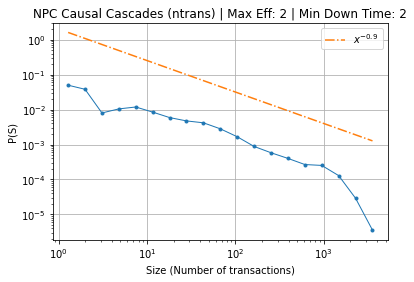

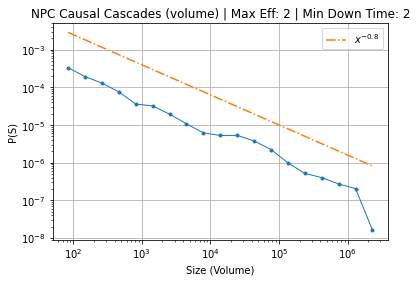

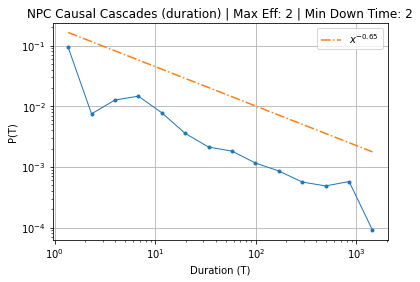

In [10]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9)*2, '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8)/10, '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.65)/5, '-.', label= "$x^{-0.65}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

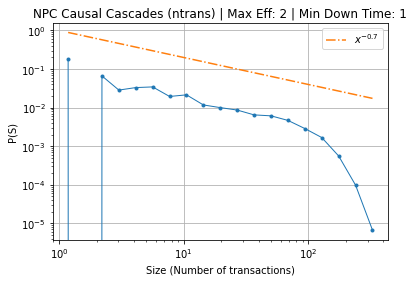

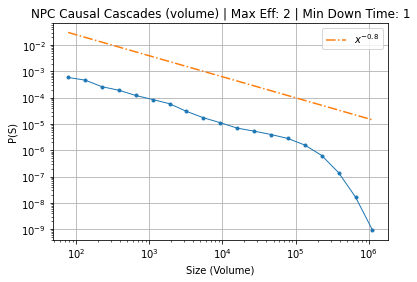

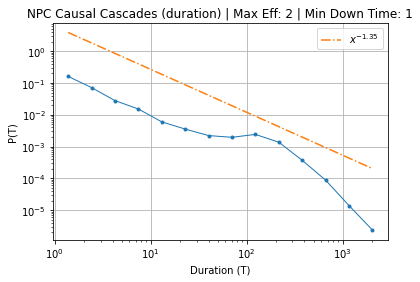

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

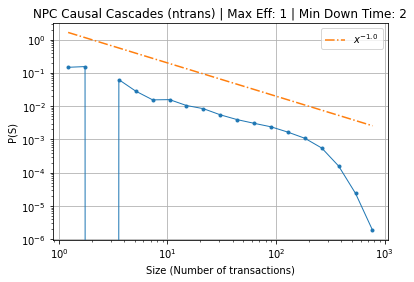

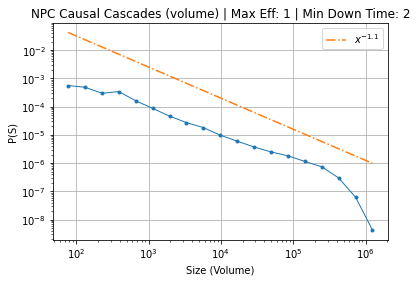

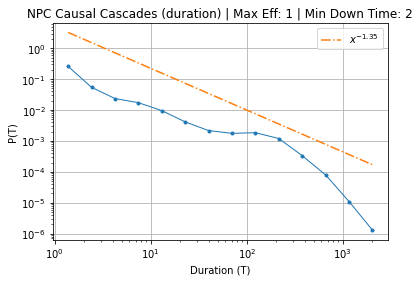

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

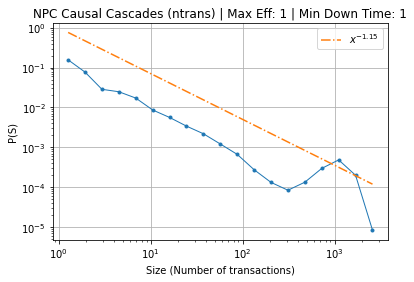

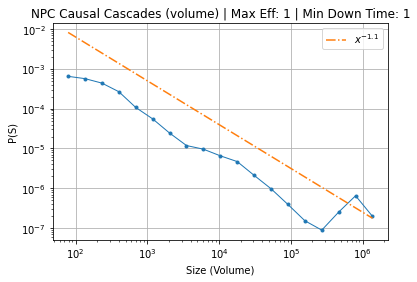

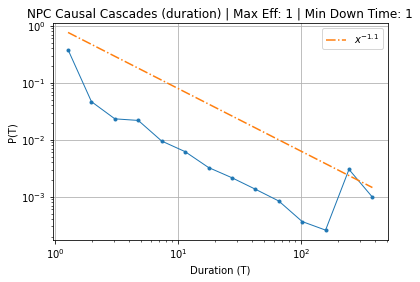

In [9]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1), '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1), '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

Unnamed: 0  time portfolio  stock  order
41                9   993     zjwdk     51   -2.0
69                2   993     ztnkc     15    1.0
70                4   993     ztnkc     60   -1.0
71                7   993     ztnkc     95   -1.0
262               3   993     zdmkf     98    9.0
...             ...   ...       ...    ...    ...
7088500           2  8192     gnqpm     56  -25.0
7088501           3  8192     gnqpm     55   10.0
7088502           5  8192     gnqpm     79    2.0
7088503           6  8192     gnqpm     85   19.0
7088504           7  8192     gnqpm     76   21.0

[7056036 rows x 5 columns]

In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

Unnamed: 0  time portfolio  stock  order
2              2   993     gozxi      6   -1.0
3              6   993     gozxi     10    2.0
4              7   993     gozxi     11    1.0
5              9   993     gozxi     13   -1.0
6             10   993     gozxi     14   -2.0
...          ...   ...       ...    ...    ...
1081           7   993     zwjtq     55   -2.0
1082           0   993     myduz     56   14.0
1083           1   993     myduz     55  -18.0
1084           4   993     myduz     85   38.0
1085           6   993     myduz     74  -14.0

[1040 rows x 5 columns]